In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

In [2]:
data_string = """
10.0,68.0
11.0,69.5
7.5,63.0
8.5,64.0
9.0,67.0
11.5,71.0
10,69
9.5,67
8.0,66
10.5,70
"""

In [3]:
data = [item.split(',') for item in data_string.strip().split('\n')]
data = np.array(data).astype(np.float)
print(data)

[[10.  68. ]
 [11.  69.5]
 [ 7.5 63. ]
 [ 8.5 64. ]
 [ 9.  67. ]
 [11.5 71. ]
 [10.  69. ]
 [ 9.5 67. ]
 [ 8.  66. ]
 [10.5 70. ]]


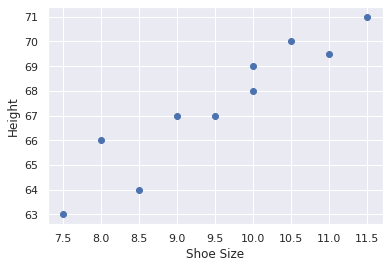

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Shoe Size')
plt.ylabel('Height')
plt.show()

In [5]:
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  diff = true_values - predicted_values
  diff_squared = diff * diff
  return np.mean(diff_squared)

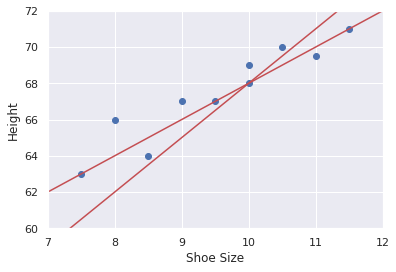

In [16]:
X = np.linspace(7, 12, 10)
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Shoe Size')
plt.ylabel('Height')
plt.xlim(7,12)
plt.ylim(60,72)
plt.plot(X, 48 + 2*X, '-r')
plt.plot(X, 38 + 3*X, '-r')
plt.show()

In [7]:
X = data[:,0]
Y = data[:,1]
print(MSE(Y, 38+3*X))
print(MSE(Y, 48+2*X))

3.25
0.825



$f(x) = mx + b$ \\
$f(x) = w_0 + w_1x$ \\
$W=[w_0, w_1]$ \\
$W=[w_0=38, w_1=3]$ \\
$W=[w_0=48, w_1=2]$ \\
\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(\hat{y}_i - y_i)^2
\end{equation}
\begin{equation}
J(w_0,w_1) = \frac{1}{m} \sum_i (w_0 + w_1x_i - y_i)^2
\end{equation}
$\textit{Minimize } J(w_0,w_1)$

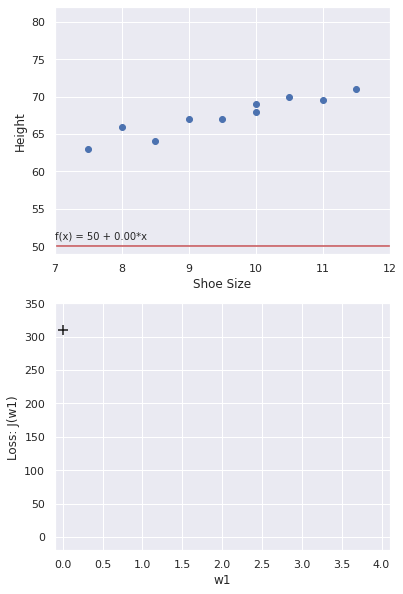

In [8]:
k=1
err_vals = []
w1_vals = np.linspace(0, 4, 55)
for w1 in w1_vals[:k]:
  err = MSE(Y, 50+w1*X)
  err_vals.append(err)

plt.subplots(figsize=[6,10])
plt.subplot(2,1,1)
X = np.linspace(7, 12, 10)
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Shoe Size')
plt.ylabel('Height')
plt.xlim(7,12)
plt.ylim(49,82)
plt.plot(X, 50+w1*X, '-r')
plt.annotate(('f(x) = 50 + %.2f*x' %w1), xy=(7,51+w1*8))

plt.subplot(2,1,2)
plt.xlabel('w1')
plt.ylabel('Loss: J(w1)')
plt.xlim(-0.1,4.1)
plt.ylim(-20,350)
plt.scatter(w1_vals[k-1:k], err_vals[k-1:k], color='k', marker='+', s=100)
plt.show()

In [9]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  #W = np.ones(n)
  W = np.array([50, 0.67])
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
      # Get the current predictions for the training examples given the
      # current estimate of W.
      predictions = np.dot(inputs, W.T)
      
      # Get the difference between the predictions and the actual target
      # values.
      diff = predictions - outputs
      
      # In standard linear regression, we want to minimize the sum of squared
      # differences.
      loss = np.sum(diff ** 2) / (2 * m)
      losses.append(loss)
      
      # Compute the gradient with respect to the loss.
      gradient = np.dot(diff, inputs) / m

      # Update W, scaling the gradient by the learning rate.
      weights.append(W)
      W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

In [10]:
def plot_learning(inputs, outputs, weights, losses):
  """Plot predictions and losses after each training epoch.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # Create a figure.
  plt.figure(1, figsize=[6,10])

  # The first subplot will contain the predictions. Start by plotting the
  # outputs (Y).
  plt.subplot(211)
  plt.xlabel('Shoe Size')
  plt.ylabel('Height')
  plt.xlim(7,12)
  plt.ylim(49,82)
  plt.xticks(inputs[:,1])
  plt.scatter(inputs[:,1], outputs, color='black', label='Y')
  
  # For each epoch, retrieve the estimated weights W, compute predictions, and
  # plot the resulting line.
  num_epochs = len(weights)
  for i in range(num_epochs):
    W = weights[i]
    predictions = np.dot(inputs, W.T)
    plt.plot(inputs[:,1], predictions, label='Epoch %d' %i)
  plt.legend()

  # The second subplot will contain the losses.
  plt.subplot(212)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xticks(range(num_epochs))
  plt.plot(range(num_epochs), losses, marker='o', color='black',
           linestyle='dashed')
  plt.show()

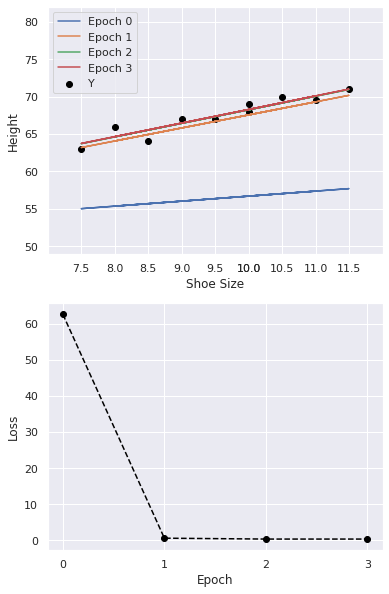

[[50.          0.67      ]
 [50.110515    1.7437425 ]
 [50.11738244  1.81130308]
 [50.11772917  1.81556228]]


In [11]:
X,Y = data[:,0], data[:,1]
X_with_1s = np.c_[np.ones(X.shape[0]), X]
weights, losses = gradient_descent(X_with_1s, Y, learning_rate=.01,
                                   num_epochs=4)
plot_learning(X_with_1s, Y, weights, losses)
print(weights)

\begin{equation}
f(x) = 50 + w_1x \\
J(w_1) = \frac{1}{m} \sum_i (50 + w_1x_i - y_i)^2 \\
f(x) = 50 + 0.0x \\
J(w_1=0.0) = \frac{1}{m} \sum_i (50 + 0.0x_i - y_i)^2 \\
f(x) = 50 + 0.07x \\
J(w_1=0.07) = \frac{1}{m} \sum_i (50 + 0.07x_i - y_i)^2 \\
f(x) = 50 + 0.67x \\
J(w_1=0.67) = \frac{1}{m} \sum_i (50 + 0.67x_i - y_i)^2 \\
f(x) = 50 + 1.70x \\
J(w_1=1.70) = \frac{1}{m} \sum_i (50 + 1.70x_i - y_i)^2 \\
\end{equation}

\begin{equation}
\frac{\partial}{\partial w} J \\
w:=w - \alpha \frac{\partial}{\partial w} J \\
\end{equation}

\begin{align}
J(w_0,w_1) &= \frac{1}{m} \sum_i (w_0 + w_1x_i - y_i)^2 \\[1ex]
\frac{\partial}{\partial w_1} J &= \frac{\partial}{\partial w_1} (\hat{y} - y)^2 \\[1ex]
&= 2(\hat{y} - y) \frac{\partial}{\partial w_1} (\hat{y} - y) \\[1ex]
&= 2(\hat{y} - y) \frac{\partial}{\partial w_1} (w_0 + w_1x - y) \\[1ex]
&= 2(\hat{y} - y)x \\[1ex]
\frac{\partial}{\partial w_0} J &= \frac{\partial}{\partial w_0} (\hat{y} - y)^2 \\[1ex]
&= 2(\hat{y} - y) \frac{\partial}{\partial w_0} (\hat{y} - y) \\[1ex]
&= 2(\hat{y} - y) \frac{\partial}{\partial w_0} (w_0 + w_1x - y) \\[1ex]
&= 2(\hat{y} - y) \\[1ex]
\end{align}


\begin{align}
w_0 &:= w_0 - \alpha \frac{1}{m} \sum_i (w_0 + w_1x_i - y_i) \\
w_1 &:= w_1 - \alpha \frac{1}{m} \sum_i (w_0 + w_1x_i - y_i)x_i \\
\end{align}

\begin{align}
\nabla J(W) &= 
\begin{pmatrix}
\frac{\partial}{\partial w_0} \\
\frac{\partial}{\partial w_1} \\
\vdots \\
\frac{\partial}{\partial w_n} \\
\end{pmatrix}
\end{align}